<a href="https://colab.research.google.com/github/vit050587/Data-analysis/blob/master/analytics_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn import datasets
from sklearn import model_selection
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
import random
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm


# Урок 1

## Задание 1

Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (eta) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [ ]:
X.shape

(2, 10)

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
y

[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [ ]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

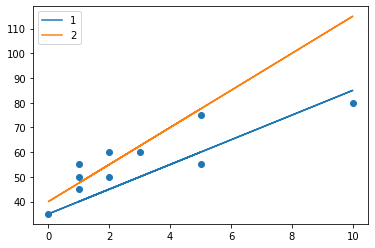

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка:

In [ ]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error):

In [ ]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error):

In [ ]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК):

In [ ]:
X.shape

(2, 10)

In [ ]:
X.T.shape

(10, 2)

In [ ]:
all(X @ y == np.dot(X,y))

True

In [ ]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [ ]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

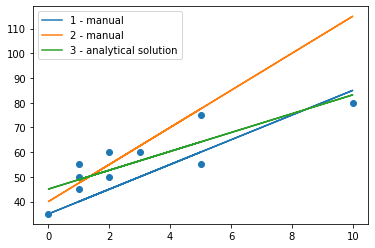

In [ ]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [ ]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [ ]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [ ]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [ ]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

In [ ]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)

(97.5, 188.75, 43.96875000000001)

Градиентный спуск

In [ ]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [ ]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [ ]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

**ДЗ**

In [ ]:
n = X.shape[1]
alpha = 1e-02
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.01)

In [ ]:
n = X.shape[1]
alpha = 0.04
iterations = 1000
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')
for i in range(iterations):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1 / n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.04        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 5.32 15.58], MSE = 3047.75
Iteration #100: W_new = [44.07620927  3.99134862], MSE = 44.46
Iteration #200: W_new = [45.0385066   3.81685083], MSE = 43.97
Iteration #300: W_new = [45.06191631  3.81260584], MSE = 43.97
Iteration #400: W_new = [45.0624858   3.81250257], MSE = 43.97
Iteration #500: W_new = [45.06249965  3.81250006], MSE = 43.97
Iteration #600: W_new = [45.06249999  3.8125    ], MSE = 43.97
Iteration #700: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #800: W_new = [45.0625  3.8125], MSE = 43.97
Iteration #900: W_new = [45.0625  3.8125], MSE = 43.97


In [ ]:
def grad_desc(X, y, alpha=1e-02, verbose=False, tol=0.0):
    n = X.shape[1]
    W = np.array([1, 0.5])                                                    # стартовые веса
    min_err = float('inf')                                                    # минимальная ошибка
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # остановка итераций
    while stop_chek:
        n_iter += 1
        y_pred = W @ X
        err = calc_mse(y, y_pred)
        if min_err - err > tol:                                               # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err

In [ ]:
W_1, mse_1 = grad_desc(X, y, alpha=0.05, verbose=True)
W_1, mse_1

100 [44.66702658  3.88421301] 44.049619635762255
200 [45.05878313  3.813174  ] 43.968757143412105
300 [45.06246507  3.81250633] 43.96875000063098
Стоп! Количество итераций: 386, W: [45.06249934  3.81250012], MSE: 43.96875000000021


(array([45.06249937,  3.81250011]), 43.96875000000021)

**Попробовал визуализацию**

In [ ]:
iterations = 300
alpha_list = []
mse_list = []

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]:
    alpha_list.append(alpha)
    errs = []
    W = np.array([1, 0.05])
    for t in range(iterations):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errs.append(err)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    mse_list.append(errs)

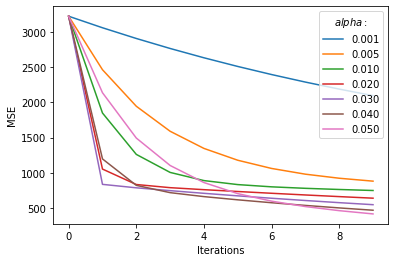

In [ ]:
lim = 10
for i in range(len(alpha_list)):
    plt.plot(range(lim), mse_list[i][:lim], label = '{:.3f}'.format(alpha_list[i]))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend(title=r'$alpha:$')

## Задание 2*

В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [ ]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(iterations):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.dot(X, (y_pred - y)))        
    W_pred = W
    if i % 100 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #100: W_new = [28.38281518  6.83710367], MSE = 177.43
Iteration #200: W_new = [38.38986469  5.02247953], MSE = 65.33


## Задание 3*

Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере diff=1e-6, а значение eta=1e-2?

In [ ]:
diff = 1e-6
eta = 1e-2
W = np.array([1, 0.5])
err_pred = np.inf
i = 0
 
while True:
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= eta * (1/n * 2 * np.dot(X, (y_pred - y)))
    i += 1
    if np.abs(err - err_pred) <= diff:
        print('Стоп!', i, W, err)
        break
err_pred = err

KeyboardInterrupt: ignored

# Урок 2

## Задание 1

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [ ]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)
W_default                                                       # Вектор весов данной модели

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

In [ ]:
y_pred_default = X @ W_default                                  # предсказания модели

In [ ]:
def calc_mse(y, y_pred):                                        # MSE
    err = np.mean((y - y_pred) ** 2)
    return err

In [ ]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340435

**GD**

In [ ]:
def One_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )                                         # стартовые веса
    min_err = float('inf')                                                    # минимальная ошибка
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # остановка итераций
    errors = []
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:                                               # сравнение ошибки
            min_err = err
        else:                      
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False        
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [ ]:
W_1, mse_1, score_1 = One_grad_desc(X, y, alpha=0.001, tol=0.00001)

Стоп! Количество итераций: 6783, W: [17.01865658 54.47010707  4.75430069 63.30973763 93.39790911 71.04150674
 86.98582232 10.23648937  3.51118527 70.8122229 ], MSE: 14.301235644381945


**SGD**

In [ ]:
def One_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0):
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )                                         # стартовое значение весов
    n_batch = n // batch_size                                                 # определяем количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')                                                    # начальное значение ошибки модели - бесконечность
    n_iter = 0                                                                # счетчик итераций
    stop_chek = True                                                          # будем чекать снижение ошибки
    errors = []                                                               # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                                                   # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:                                       # контролируем текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                                                 # остановка по достижении tol
            print(
                f'Стоп! Количество итераций: {n_iter}, W: {W}, MSE: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [ ]:
W_2, mse_2, score_2 = One_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Стоп! Количество итераций: 5506, W: [17.03735609 54.52260356  4.6820977  63.30907103 93.32723617 71.13171049
 86.88880182 10.12867922  3.54072336 70.68920442], MSE: 10.995979824130773


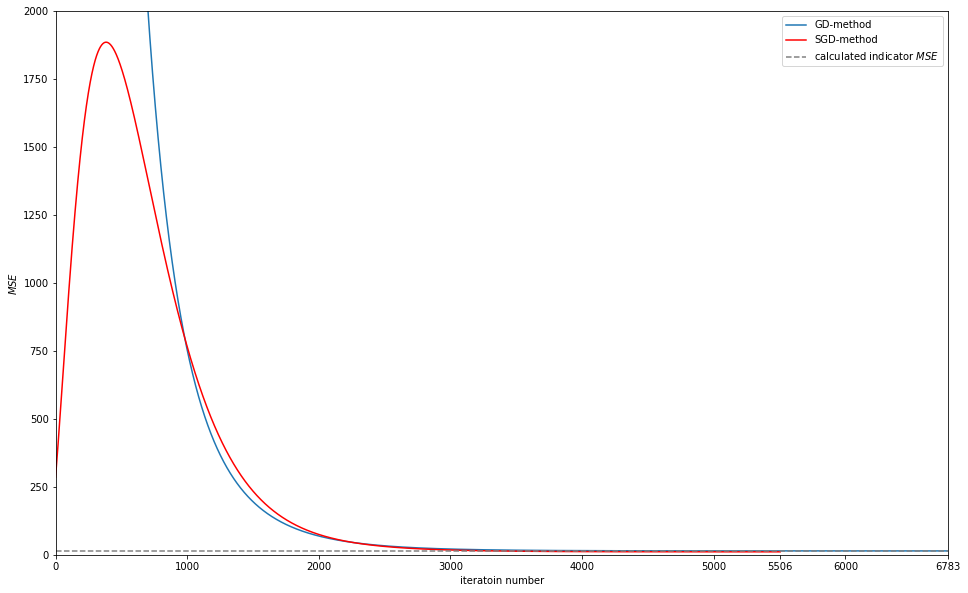

In [ ]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

**Вывод**: на основании графиков можно сделать вывод что примерно до 800-й итерации **SGD** 'расходился'(значение **MSE** росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения **GD** была выше, чем у **SGD**. Однако затем скорости уравнялись, и **SGD** сошелся раньше чем **GD**

## Задание 2

Модифицировать решение первого задания путем добавления  L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

* Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.
* Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?
* Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

# Урок 3

## Задание 1

 Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.T, y)
model.predict(X.T)

array([0.2617132 , 0.17509907, 1.02794228, 0.21840613, 0.53795688,
       0.31862798, 1.20396413, 0.05324898, 0.28336673, 0.91967463])

In [ ]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [ ]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [ ]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [ ]:
y_pred=sigmoid(model.predict(X.T))
y_pred

array([0.56505739, 0.54366327, 0.73651677, 0.55438552, 0.63133701,
       0.57898984, 0.76922923, 0.5133091 , 0.57037143, 0.7149758 ])

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

**Модифицируем функцию:**

In [ ]:
def calc_logloss_mod(y, y_pred):
    y_pred_res=np.where(y_pred==1, y_pred-1e-07, np.where(y_pred==0, y_pred+1e-07, y_pred))
    err = - np.mean(y * np.log(y_pred_res) + (1.0 - y) * np.log(1.0 - y_pred_res))
    return err

Для проверки изменим вектор предсказанных значений, добавив в него нули и единицы

In [ ]:
y_pred1=np.array([0.56505739, 0., 0.73651677, 0.55438552, 1.,
       0.57898984, 0.76922923, 0.5133091 , 0., 0.7149758 ])
calc_logloss_mod(y, y_pred1)

2.024785862818215

Исходная функция при этом возвращает nan

In [ ]:
calc_logloss(y, y_pred1)

nan

## Задание 2

Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_mod(y, y_pred)                                     # заменим на модифицированную нами функцию
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [ ]:
W = eval_model(X_st, y, iterations=1000, alpha=1e-5)

1000 [ 0.49282757 -0.15007512  0.64748969  1.51727928] 1.2013133809011647


для подбора параметров модифицируем функцию, для остановки до достижения заданного количества итераций, если величина ошибки не изменяется выше указанного показателя

In [ ]:
def eval_model(X, y, verbose=False, alpha=1e-4, tol=0.00001): 
    view_ind = 10**(-np.log10(tol)-2) if -np.log10(tol)-2>=1 else 1           # задаём параметр кратности вывода промежуточных результатов
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    min_err = float('inf')                                                    # начальное значение ошибки модели - бесконечность
    n_iter = 0                                                                # отслеживаем количество итераций
    stop_chek = True
    errors = []                                                               # добавлено для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_mod(y, y_pred)                                     # заменим на модифицированную нами функцию
        errors.append(err)
        if min_err - err > tol:                                               # контролируем текущее значение ошибки
            min_err = err
        else:                                                                 # если снижение прекратилось, останавливаемся.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, logloss: {min_err}')
            stop_chek = False
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if verbose:
            if n_iter % view_ind == 0:
                print(n_iter, W, err)
    return W, min_err, n_iter

In [ ]:
W = eval_model(X_st, y, alpha=0.6, tol=0.00001, verbose=True)

1000 [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.2823965843259973
2000 [-12.40065236  -1.54519184  -2.73360596  10.40076601] 0.24130322780777833
3000 [-15.36100912  -1.79394114  -3.63840883  12.7942367 ] 0.21560879813812384
4000 [-17.89496779  -2.01191968  -4.40078502  14.84932619] 0.1967862662226779
5000 [-20.12312962  -2.20577442  -5.0641727   16.65729995] 0.18224763493044263
6000 [-22.11355698  -2.38010899  -5.65216163  18.27197463] 0.17065959157189317
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242


Подберем лучшие параметры $\alpha$ для модели(поскольку функция сама отслеживает оптимальное количество итераций, то других параметров подбирать не нужно):

In [ ]:
def get_best_params(X,y,args):
    best_params=[]
    for arg in args:
        W,err,n_iter = eval_model(X, y, alpha=arg)
        best_params.append((arg,err,n_iter))
    best_params.sort(key=lambda x:x[1])
    print(f'best - alpha: {best_params[0][0]},\nresults:\nerr: {best_params[0][1]},\nn_iter: {best_params[0][2]}')
    return best_params[0]

In [ ]:
alphas=[1, 0.5,0.1,0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001, 0.000005, 0.000001, 0.0000005, 0.0000001]
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 4, weights: [-0.01512682 -1.44851808  0.75644797  1.06048112], logloss: 0.9360085439942413
Stop descent! iteration: 6391, weights: [-20.79292735  -2.26433611  -5.26248927  17.20072759], logloss: 0.17820649249087692
Stop descent! iteration: 5853, weights: [-8.53503588 -1.24557698 -1.51126618  7.32961021], logloss: 0.28385397215014785
Stop descent! iteration: 6493, weights: [-6.18756485 -1.10137381 -0.7192765   5.56154533], logloss: 0.3198397227902269
Stop descent! iteration: 6823, weights: [-2.01966427 -0.97319445  0.84001927  2.78391711], logloss: 0.43337113257078075
Stop descent! iteration: 4134, weights: [-0.6636217  -0.82018794  1.11647506  1.7462896 ], logloss: 0.4980620278791868
Stop descent! iteration: 3017, weights: [ 0.06153887 -0.68603638  0.85254687  1.2130508 ], logloss: 0.555828709755477
Stop descent! iteration: 3104, weights: [ 0.19306961 -0.69531514  0.74058514  1.21943805], logloss: 0.5765738129341405
Stop descent! iteration: 6890, weights: [ 0.3

(0.5, 0.17820649249087692, 6391)

Лучший результат получаем при $\alpha  = 0.5$

Попробуем подобрать $\alpha$ из интервала $(1,0.1)$

In [ ]:
alphas=np.arange(1,10)/10
bp=get_best_params(X_st,y,alphas)
bp

Stop descent! iteration: 5853, weights: [-8.53503588 -1.24557698 -1.51126618  7.32961021], logloss: 0.28385397215014785
Stop descent! iteration: 6187, weights: [-12.59825223  -1.5614873   -2.79460722  10.55999424], logloss: 0.23942165779557908
Stop descent! iteration: 6534, weights: [-16.06978213  -1.85457135  -3.85261322  13.36879382], logloss: 0.21006752362747183
Stop descent! iteration: 6535, weights: [-18.71799582  -2.08333293  -4.64651497  15.51714508], logloss: 0.19120600628315837
Stop descent! iteration: 6391, weights: [-20.79292735  -2.26433611  -5.26248927  17.20072759], logloss: 0.17820649249087692
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242
Stop descent! iteration: 6, weights: [ 9.91945996e-04 -8.78773470e-01  8.74063808e-01  1.19348750e+00], logloss: 0.5868163760298954
Stop descent! iteration: 4, weights: [ 0.06140228 -1.1126246   0.76192585  1.11769668], logloss: 0.6865501501467717
Stop descent

(0.6, 0.16858809293234242, 6204)

Лучший параметр скорости обучения для нашего примера $\alpha  = 0.6$

## Задание 3

Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.

In [ ]:
def calc_pred_proba(w, x): 
    pred_proba = sigmoid(np.dot(w, x))
    return pred_proba

In [ ]:
W,_err,_it = eval_model(X_st, y, alpha=0.6, verbose=True)

1000 [-8.650831   -1.25372329 -1.54901597  7.41955336] 0.2823965843259973
2000 [-12.40065236  -1.54519184  -2.73360596  10.40076601] 0.24130322780777833
3000 [-15.36100912  -1.79394114  -3.63840883  12.7942367 ] 0.21560879813812384
4000 [-17.89496779  -2.01191968  -4.40078502  14.84932619] 0.1967862662226779
5000 [-20.12312962  -2.20577442  -5.0641727   16.65729995] 0.18224763493044263
6000 [-22.11355698  -2.38010899  -5.65216163  18.27197463] 0.17065959157189317
Stop descent! iteration: 6204, weights: [-22.49301224  -2.41343975  -5.76381384  18.57970581], logloss: 0.16858809293234242


In [ ]:
y_pred_prob = calc_pred_proba(W, X_st)
y_pred_prob

array([0.33613789, 0.04486849, 0.99999633, 0.13361891, 0.85570148,
       0.13784668, 0.99999968, 0.04426597, 0.47847259, 0.99992831])

## Задание 4

Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [ ]:
def calc_pred(w,x, prob_lim=0.5):                                             # установим порог вероятности, при превышении которого, объект будет относиться к классу 1
    pred_proba = sigmoid(np.dot(w, x))
    pred=np.zeros_like(pred_proba)
    for idx, prob in enumerate(pred_proba):
        if prob>prob_lim:
            pred[idx]=1
    return pred

In [ ]:
y_pred=calc_pred(W, X_st)
y_pred

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

## Задание 5

Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

$$accuracy = \frac{TP +TN}{TP+FP+TN+FN} $$

In [ ]:
def my_accuracy(real, pred):
    all_res=len(real)
    trues=0
    for i in range(all_res):
        trues+=int(real[i]==pred[i])
    return trues/all_res

In [ ]:
my_accuracy(y,y_pred)

0.9

Проверка:

$$\frac{TP|FP}{FN|TN} $$

In [ ]:
def my_confusion_matrix(real, pred):
    n_classes=len(np.unique(real))
    all_res=len(real)
    conf_matr=np.zeros((n_classes,n_classes), dtype='int')
    for i in range(all_res):
        conf_matr[int(real[i])][int(pred[i])] += 1
    return conf_matr  

In [ ]:
my_confusion_matrix(y,y_pred)

array([[5, 0],
       [1, 4]])

In [ ]:
confusion_matrix(y,y_pred)

array([[5, 0],
       [1, 4]])

$$precision = \frac{TP}{TP+FP} $$

In [ ]:
def my_precision(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fp)
    

In [ ]:
my_precision(y,y_pred)

1.0

In [ ]:
precision_score(y,y_pred)

1.0

$$recall = \frac{TP}{TP+FN} $$

In [ ]:
def my_recall(real, pred):
    tn, fp, fn, tp = my_confusion_matrix(real, pred).ravel()
    return tp/(tp+fn)

In [ ]:
my_recall(y,y_pred)

0.8

In [ ]:
recall_score(y,y_pred)

0.8

$$F_{\beta} = (1 + \beta^{2}) \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}.$$

In [ ]:
def my_f1(real, pred, beta=1):
    return (1+beta**2)*my_precision(real, pred)*my_recall(y,y_pred)/(beta**2*my_precision(real, pred)+my_recall(y,y_pred))

In [ ]:
my_f1(y,y_pred)

0.888888888888889

In [ ]:
f1_score(y,y_pred)

0.888888888888889

## Задание 6

Могла ли модель переобучиться? Почему?

Модель логистической регрессии склонна к переобучению, в следствии того что мы используем сигмоиду для того, чтобы преобразовать в вероятность предсказания линейной модели. А т.к. сигмоида не имеет максимума и минимума, а только асимптоты в $0$ и $1$, градиентный спуск не может достичь оптимального решения с помощью градиентных шагов доводя веса до все более экстремальных значений, пытаясь достичь нулевых потерь. При большой размерности данных вероятность этого еще больше увеличивается. Поэтому в качестве способа регуляризации можно использовать раннюю остановку работы модели, а так же $L1$ и $L2$ регуляризацию.

# Урок 4

## Задание 1

In [ ]:
# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2, 
    n_classes=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.75,
    random_state=5
)

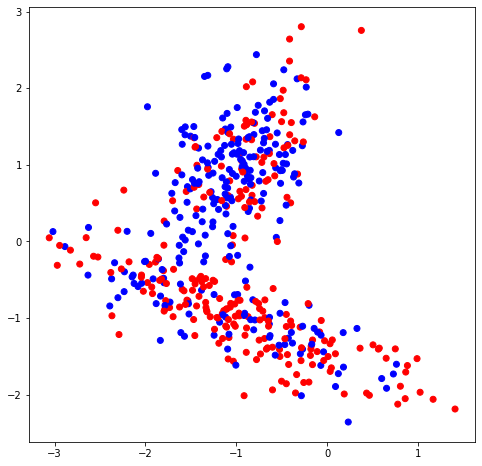

In [ ]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)

In [ ]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index                                                    # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t                                                            # значение порога
        self.true_branch = true_branch                                        # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch                                      # поддерево, не удовлетворяющее условию в узле

In [ ]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction       

In [ ]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [ ]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [ ]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [ ]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5
    
    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [ ]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [ ]:
def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [ ]:
# Напечатаем ход нашего дерева
def print_tree(node, spacing=""):

    # Если лист, то выводим его прогноз
    if isinstance(node, Leaf):
        print(spacing + "Прогноз:", node.prediction)
        return

    # Выведем значение индекса и порога на этом узле
    print(spacing + 'Индекс', str(node.index))
    print(spacing + 'Порог', str(node.t))

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Рекурсионный вызов функции на положительном поддереве
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")
    

In [ ]:
# Введем функцию подсчета точности как доли правильных ответов
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [ ]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

В коде из методички реализуйте один или несколько критериев останова: минимальное количество объектов в листе (min_leaf), максимальная глубина дерева, максимальное количество листьев и т.д. Добавьте эти критерии в параметры функции build_tree и проверьте ее работоспособность с помощью визуализации дерева (функция print_tree).

введем критерий остановки по достижении заданной глубины дерева, с регулируемым количеством элементов в листе:

In [ ]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_leaf):
    
    #  обозначим минимальное количество объектов в узле(если не задано, то приравниваем к 1)
    min_leaf = min_leaf if min_leaf else 1
    
    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
# Построение дерева с помощью рекурсивной функции, добавлено ограничение глубины, и минимальное количество элементов в листе:

def build_tree(data, labels, max_depth=None, min_leaf=None):
    
    # Если глубина не задана, будем строить по максимуму
    max_depth=max_depth if max_depth!=None else data.shape[0]*data.shape[1]

    quality, t, index = find_best_split(data, labels, min_leaf)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, или достигли максимальной глубины
    if quality == 0 or max_depth==0 :
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева, уменьшая их глубину
    true_branch = build_tree(true_data, true_labels,max_depth=max_depth-1,min_leaf=min_leaf)
    false_branch = build_tree(false_data, false_labels,max_depth=max_depth-1, min_leaf=min_leaf)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [ ]:
# Разобьем выборку на обучающую и тестовую

from sklearn import model_selection

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_data, classification_labels, test_size = 0.3, random_state = 1
)

In [ ]:
# Построим дерево по обучающей выборке
my_tree = build_tree(train_data, train_labels, max_depth=6, min_leaf=15)

In [ ]:
print_tree(my_tree)

Индекс 1
Порог -0.46624201061399206
--> True:
  Индекс 0
  Порог -1.7945477571816848
  --> True:
    Прогноз: 1
  --> False:
    Индекс 0
    Порог -1.1834902220493384
    --> True:
      Прогноз: 0
    --> False:
      Индекс 1
      Порог -1.2659561512192585
      --> True:
        Индекс 0
        Порог 0.04595444880264021
        --> True:
          Индекс 1
          Порог -1.4684500103378144
          --> True:
            Прогноз: 0
          --> False:
            Прогноз: 0
        --> False:
          Прогноз: 0
      --> False:
        Индекс 0
        Порог -0.645018457805447
        --> True:
          Индекс 1
          Порог -0.9370288134393376
          --> True:
            Прогноз: 0
          --> False:
            Прогноз: 0
        --> False:
          Прогноз: 1
--> False:
  Индекс 0
  Порог -0.9820958539320116
  --> True:
    Индекс 0
    Порог -1.6445609784573159
    --> True:
      Индекс 0
      Порог -2.1808550952749775
      --> True:
        Прогноз: 0
    

In [ ]:
# Получим ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [ ]:
# И получим ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [ ]:
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

72.57142857142857

In [ ]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

60.66666666666667

Text(0.5, 1.0, 'Test accuracy=60.67')

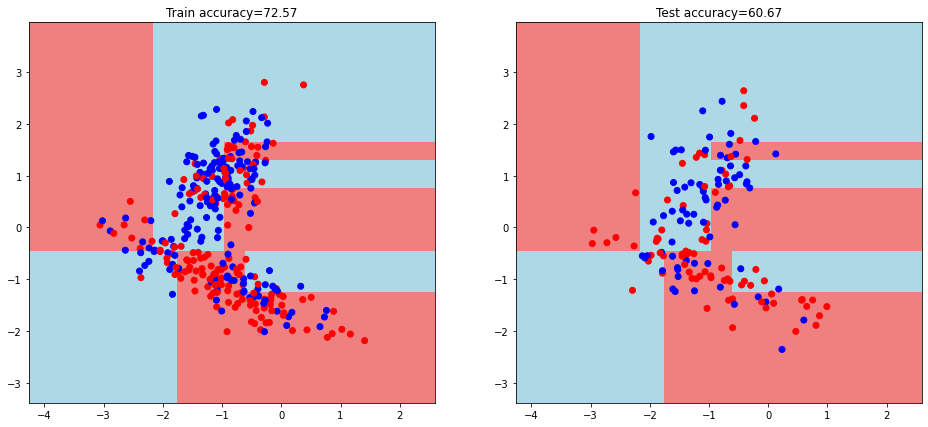

In [ ]:
plt.figure(figsize = (16, 7))

# график обучающей выборки
plt.subplot(1,2,1)
xx, yy = get_meshgrid(train_data)
mesh_predictions = np.array(predict(np.c_[xx.ravel(), yy.ravel()], my_tree)).reshape(xx.shape)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
plt.title(f'Train accuracy={train_accuracy:.2f}')

# график тестовой выборки
plt.subplot(1,2,2)
plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.title(f'Test accuracy={test_accuracy:.2f}')

## Задание 2*

Для задачи классификации обучите дерево решений с использованием критериев разбиения Джини и Энтропия. Сравните качество классификации, сделайте выводы.

In [ ]:
# Расчет критерия энтропии

def entropy(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 0
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p*np.log2(p) if p!=0 else 0
    
        
    return impurity

In [ ]:
# Расчет качества  в зависимости от переданного критерия

def quality(left_labels, right_labels, current_criterion, criterion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    if criterion=='entropy':
        qual=current_criterion - p * entropy(left_labels) - (1 - p) * entropy(right_labels)
    else:
        qual=current_criterion - p * gini(left_labels) - (1 - p) * gini(right_labels)  
    
    return qual

In [ ]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels, min_leaf, criterion):
    
    #  обозначим минимальное количество объектов в узле(если не задано, то приравниваем к 1)
    min_leaf = min_leaf if min_leaf else 1
    # проверяем критерий оценки
    current_criterion = entropy(labels) if criterion=='entropy' else gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_criterion, criterion)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index
    return best_quality, best_t, best_index

In [ ]:
# Построение дерева с помощью рекурсивной функции, добавлено ограничение глубины, и минимальное количество элементов в листе
# А также выбираем критерий оценки (по умолчанию 'Gini')

def build_tree(data, labels, max_depth=None, min_leaf=None,criterion='Gini'):
    
    # Если глубина не задана, будем строить по максимуму
    max_depth=max_depth if max_depth!=None else data.shape[0]*data.shape[1]

    quality, t, index = find_best_split(data, labels, min_leaf, criterion)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества, или достигли максимальной глубины
    if quality == 0 or max_depth==0 :
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева, уменьшая их глубину
    true_branch = build_tree(true_data, true_labels,max_depth=max_depth-1,min_leaf=min_leaf, criterion=criterion)
    false_branch = build_tree(false_data, false_labels,max_depth=max_depth-1, min_leaf=min_leaf, criterion=criterion)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [ ]:
my_tree = build_tree(train_data, train_labels, max_depth=4, min_leaf=15)

In [ ]:
my_tree1 = build_tree(train_data, train_labels, max_depth=4, min_leaf=15, criterion='entropy')

In [ ]:
# Получим ответы для обучающей выборки 
train_answers = predict(train_data, my_tree)

In [ ]:
# И получим ответы для тестовой выборки
answers = predict(test_data, my_tree)

In [ ]:
train_accuracy = accuracy_metric(train_labels, train_answers)
train_accuracy

69.71428571428572

In [ ]:
# Точность на тестовой выборке
test_accuracy = accuracy_metric(test_labels, answers)
test_accuracy

63.33333333333333

In [ ]:
train_answers1 = predict(train_data, my_tree1)
answers1 = predict(test_data, my_tree1)

In [ ]:
train_accuracy1 = accuracy_metric(train_labels, train_answers1)
train_accuracy1

69.71428571428572

In [ ]:
test_accuracy1 = accuracy_metric(test_labels, answers1)
test_accuracy1

63.33333333333333

**Вывод:** качество классификации не изменилось, поскольку оба критерия достигают своих максимальных значений, когда все объекты относятся к одному класссу, а максимум - при равномерном распределении.

## Задание 3*

Реализуйте дерево для задачи регрессии. Возьмите за основу дерево, реализованное в методичке, заменив механизм предсказания в листе на взятие среднего значения по выборке, а критерий Джини на дисперсию значений. Проверьте точность предсказания дерева на одной из метрик задачи регрессии.

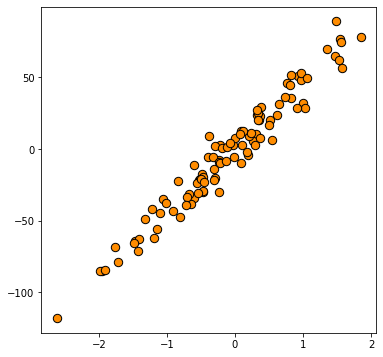

In [ ]:
# 3 задание
from sklearn import datasets

regression_data, regression_labels = datasets.make_regression(n_samples=100, 
                                                      n_features=1, noise=10,
                                                      random_state=42)
plt.figure(figsize=(6,6))
plt.scatter(regression_data, regression_labels, c='darkorange', edgecolor='black', s=70);

# Урок 5

## Задание 1

Сформировать с помощью sklearn.make_classification датасет из 1000 объектов с двумя признаками.
Обучить случайный лес из 1, 3, 10, 50, 100 и 200 деревьев (за основу взять реализацию построения этого алгоритма из урока).
Визуализировать их разделяющие линии на графиках (по подобию визуализации деревьев из предыдущего урока, необходимо только заменить вызов функции predict на tree_vote).
Сделать выводы о получаемой сложности гиперплоскости и недообучении или переобучении случайного леса в зависимости от количества деревьев в нем.

In [ ]:
# Генерация N-бутстрап выборок

random.seed(42)
 
def get_bootstrap(data, labels, N):
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]            
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [ ]:
def get_subsample(len_sample):
    sample_indexes = [i for i in range(len_sample)]                           # будем сохранять не сами признаки, а их индексы
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

Дерево решений

In [ ]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index                                                    # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t                                                            # значение порога
        self.true_branch = true_branch                                        # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch                                      # поддерево, не удовлетворяющее условию в узле

In [ ]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}                                                          # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1

        prediction = max(classes, key=classes.get)                            # найдем класс, количество объектов которого будет максимальным в этом листе и вернем его 
        return prediction    

In [ ]:
# Расчет критерия Джини

def gini(labels):

    classes = {}                                                              # подсчет количества объектов разных классов
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
        
    impurity = 1                                                              # расчет критерия
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [ ]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])         # доля выбоки, ушедшая в левое поддерево
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [ ]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [ ]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    min_leaf = 5                                                              # обозначим минимальное количество объектов в узле

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    

    subsample = get_subsample(n_features)                                     # выбор индекса из подвыборки длиной sqrt(n_features)
    
    for index in subsample:
        
        t_values = np.unique([row[index] for row in data])                    # будем проверять только уникальные значения признака, исключая повторения
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

            if len(true_data) < min_leaf or len(false_data) < min_leaf:       # пропускаем разбиения, в которых в узле остается менее 5 объектов
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            
            if current_quality > best_quality:                                # выбираем порог, на котором получается максимальный прирост качества
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [ ]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

Формирование случайного леса

In [ ]:
def random_forest(data, labels, n_trees):
    forest = [] # список деревьев
    bootstrap = get_bootstrap(data, labels, n_trees) # создаем n_trees бутстреп выборок
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels)) # добавляем по дереву в ансамбль
    return forest

In [ ]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [ ]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [ ]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [ ]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

Сгенерируем Датасет

In [ ]:
classification_data, classification_labels = datasets.make_classification(
    n_samples=1000,
    n_features = 2, 
    n_informative = 2, 
    n_classes = 2, 
    n_redundant=0, 
    n_clusters_per_class=1,
    random_state=55
)

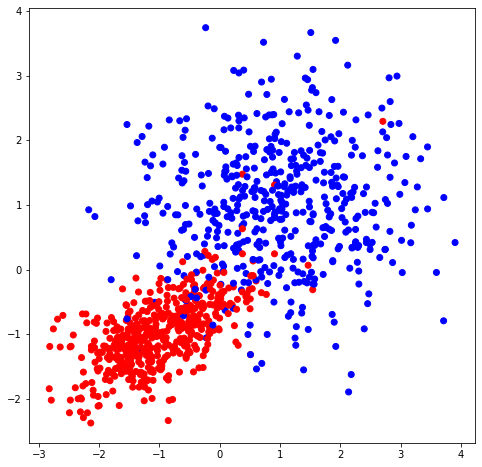

In [ ]:
# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.show()

In [ ]:
# Разобьем выборку на обучающую и тестовую


train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_data, 
                                                                                     classification_labels, 
                                                                                     test_size = 0.3,
                                                                                     random_state = 14)

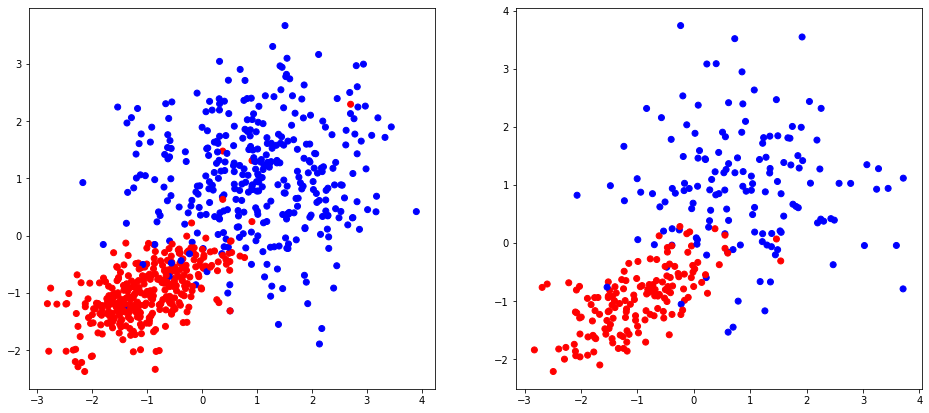

In [ ]:
# визуализируем данные трейна и теста

plt.figure(figsize = (16, 7))
plt.subplot(1,2,1)
plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)

plt.subplot(1,2,2)
plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
plt.show()

In [ ]:
# Визуализируем дерево на графике

def get_meshgrid(data, step=.05, border=1.2):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step)) # список массивов координатных сеток

In [ ]:
GLOB=[] #глобальная переменная для сохранения результата

def get_report(train_data, train_labels, test_data, test_labels, n_trees):
    global GLOB
    my_forest=random_forest(train_data, train_labels, n_trees)
    train_answers = tree_vote(my_forest, train_data)
    test_answers = tree_vote(my_forest, test_data)
    train_accuracy = accuracy_metric(train_labels, train_answers)
    print(f'Точность случайного леса из {n_trees} деревьев на обучающей выборке: {train_accuracy:.3f}')
    test_accuracy = accuracy_metric(test_labels, test_answers)
    print(f'Точность случайного леса из {n_trees} деревьев на тестовой выборке: {test_accuracy:.3f}')
        
    plt.figure(figsize = (16, 7))
        
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(tree_vote(my_forest, np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape) # определяем цвета квадратов в сетке
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, cmap = colors)
    plt.title(f'N_trees={n_trees}\nTrain accuracy={train_accuracy:.2f}')
        
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, cmap = colors)
    plt.title(f'N_trees={n_trees}\nTest accuracy={test_accuracy:.2f}')
        
    GLOB.append([n_trees,train_accuracy,test_accuracy])

Построим лес из одного дерева

Точность случайного леса из 1 деревьев на обучающей выборке: 94.571
Точность случайного леса из 1 деревьев на тестовой выборке: 92.000


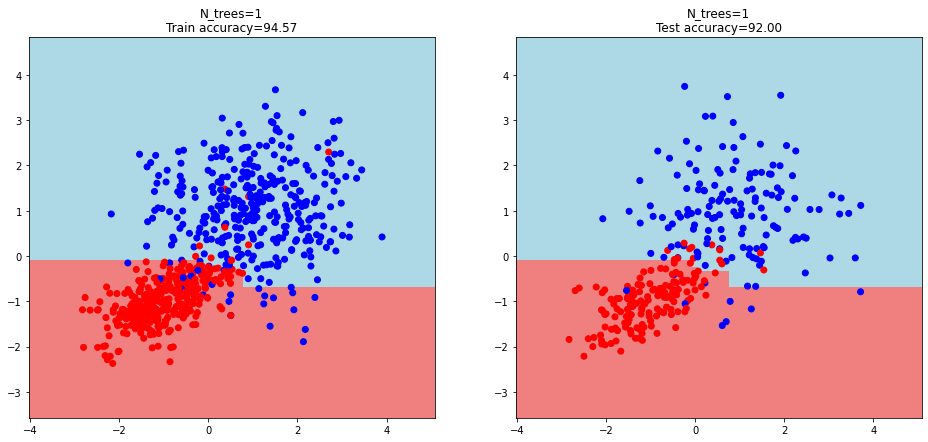

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 1)

Построим из трех

Точность случайного леса из 3 деревьев на обучающей выборке: 96.286
Точность случайного леса из 3 деревьев на тестовой выборке: 93.667


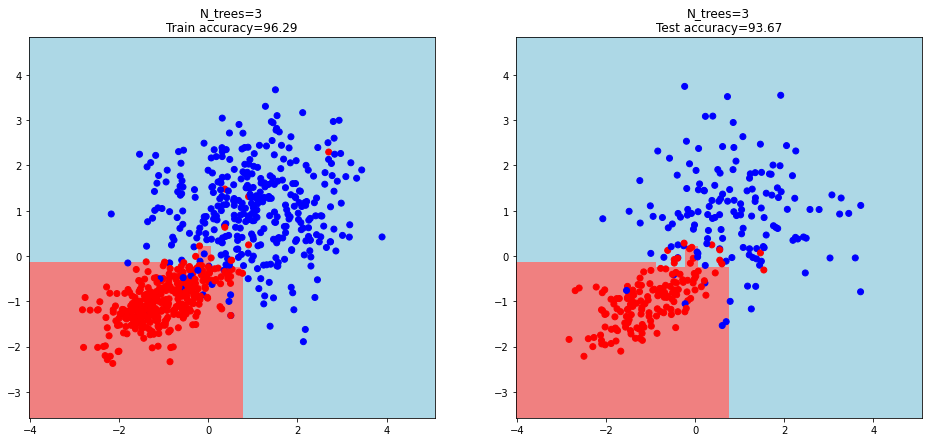

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 3)

из 10

Точность случайного леса из 10 деревьев на обучающей выборке: 97.000
Точность случайного леса из 10 деревьев на тестовой выборке: 94.333


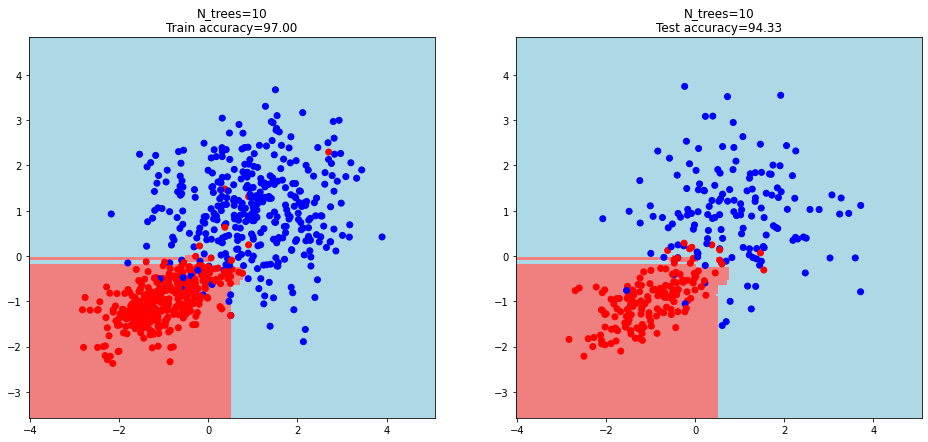

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 10)

из 50

Точность случайного леса из 50 деревьев на обучающей выборке: 96.286
Точность случайного леса из 50 деревьев на тестовой выборке: 94.667


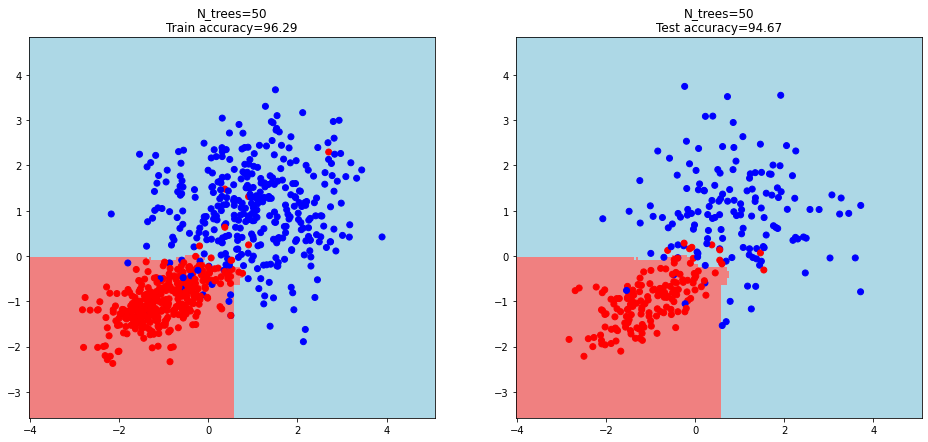

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 50)

из 100

Точность случайного леса из 100 деревьев на обучающей выборке: 96.143
Точность случайного леса из 100 деревьев на тестовой выборке: 94.333


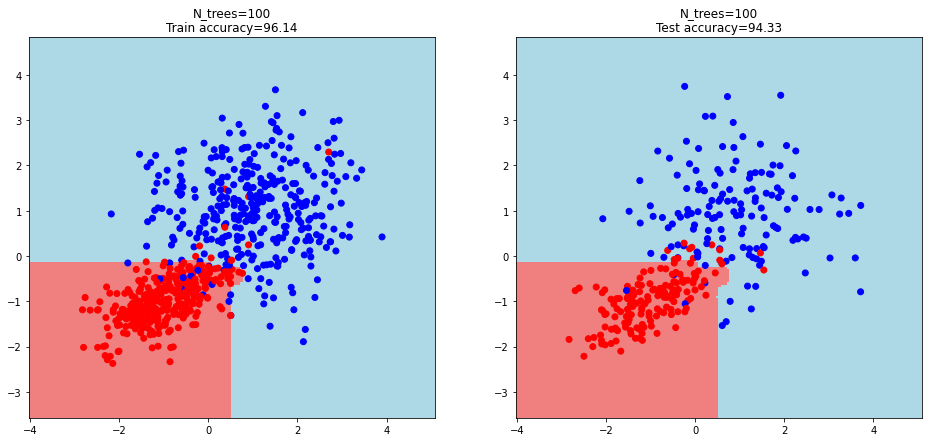

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 100)

из 200

Точность случайного леса из 200 деревьев на обучающей выборке: 96.571
Точность случайного леса из 200 деревьев на тестовой выборке: 94.000


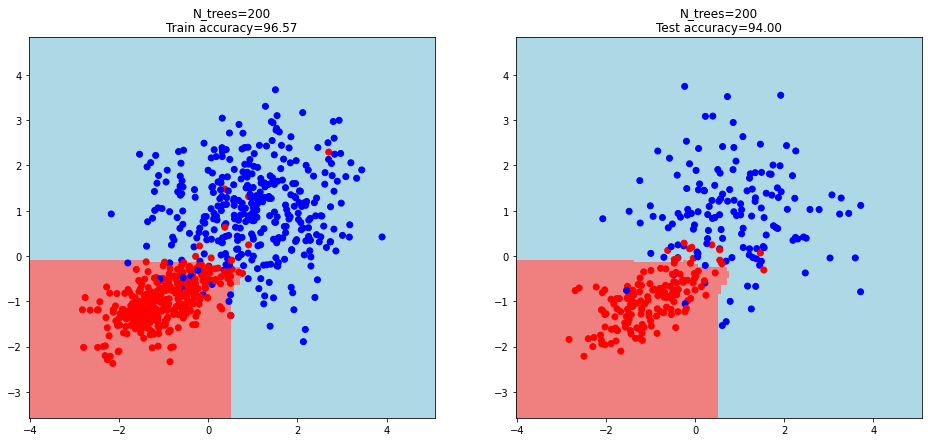

In [ ]:
get_report(train_data, train_labels, test_data, test_labels, 200)

Покажем результаты в таблице

In [ ]:
report = pd.DataFrame(GLOB, columns=['n_trees', 'train_accuracy','test_accuracy'])
report

,n_trees,train_accuracy,test_accuracy
0,1,94.571429,92.000000
1,3,96.285714,93.666667
2,10,97.000000,94.333333
3,50,96.285714,94.666667
4,100,96.142857,94.333333
5,200,96.571429,94.000000


Из результатов видно, что с увеличением числа деревьев модель не переобучается, ошибка на трейне и на тесте выходит на асимптоту. При этом, по мере увеличения числа деревьев разделяющая гиперплоскость избавляется от длинных тонких линий, которые говорят о попытке модели подстроится под данные, она становится более "простой", не теряя при этом эффективности в разделении данных.

# Урок 6

## Задание 1

Для реализованной в методичке модели градиентного бустинга построить зависимости ошибки от количества деревьев при разных значениях шага градиента на одном графике и для разной глубины деревьев на другом.

Сделать выводы о зависимости ошибки от этих гиперпараметров (шаг градиента, максимальная глубина деревьев, количество деревьев).

Подобрать оптимальные значения этих гиперпараметров (минимум ошибки на тесте при отсутствии переобучения).

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [ ]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [ ]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем  ($L_{2}$ loss):

$L(y, z) = (y-z)^{2},$  ее производная по  примет вид . Реализуем ее также в виде функции (коэффициент 2 можно отбросить).
его производная по $z$ примет вид: 
$L'(y, z) = 2(z-y)$

Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [164]:
def bias(y, z):
    return (y - z)

Реализуем функцию обучения градиентного бустинга.

In [165]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

автоматизация обучения

In [166]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

Решение

In [168]:
X, y = load_diabetes(return_X_y=True)

In [169]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25
)

исследуем зависимость от числа деревьев

In [170]:
def get_errors(X_train, X_test, y_train, y_test, eta, n_trees):
    all_train_err={}
    all_test_err={}
    for depth in tqdm(range(1,8,2)):
        train_err=[]
        test_err=[]
        for n_tree in tqdm(n_trees):
            coefs=[1]*n_tree
            trees, train_errors, test_errors=gb_fit(n_tree, depth, X_train, X_test, y_train, y_test, coefs, eta)
            train_pred = gb_predict(X_train, trees, coefs, eta)
            train_err.append(mean_squared_error(y_train, train_pred))
            test_pred=gb_predict(X_test, trees, coefs, eta)
            test_err.append(mean_squared_error(y_test, test_pred))
    
        all_train_err[depth]=train_err
        all_test_err[depth]=test_err
    return all_train_err, all_test_err,eta,n_trees

In [171]:
def get_plot(train_err,test_err,eta,n_trees):
    fif, ax= plt.subplots(figsize = (16, 18))
    plt.subplot(2,1,1)
    for key in train_err.keys():
        
        
        plt.plot(n_trees,train_err[key], label=f'eta={eta}\ndepth={key}')
    plt.title(f'Ошибка на тренировочной выборке в \nзависимости от глубины и числа деревьев')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Величина ошибки')
    plt.legend()
        
    plt.subplot(2,1,2)
    for key in test_err.keys():    
        plt.plot(n_trees,test_err[key], label=f'eta={eta}\ndepth={key}')
    plt.title(f'Ошибка на тестовой выборке в \nзависимости от глубины и числа деревьев')
    plt.xlabel('Количество деревьев')
    plt.ylabel('Величина ошибки')
    plt.legend()
    plt.show()

In [172]:
n_trees=[1, 5, 10, 30, 50, 100]
eta=0.1
tr_err, tst_err, eta, n_trees=get_errors(X_train, X_test, y_train, y_test, eta, n_trees)

100%|██████████| 4/4 [24:41<00:00, 370.26s/it]


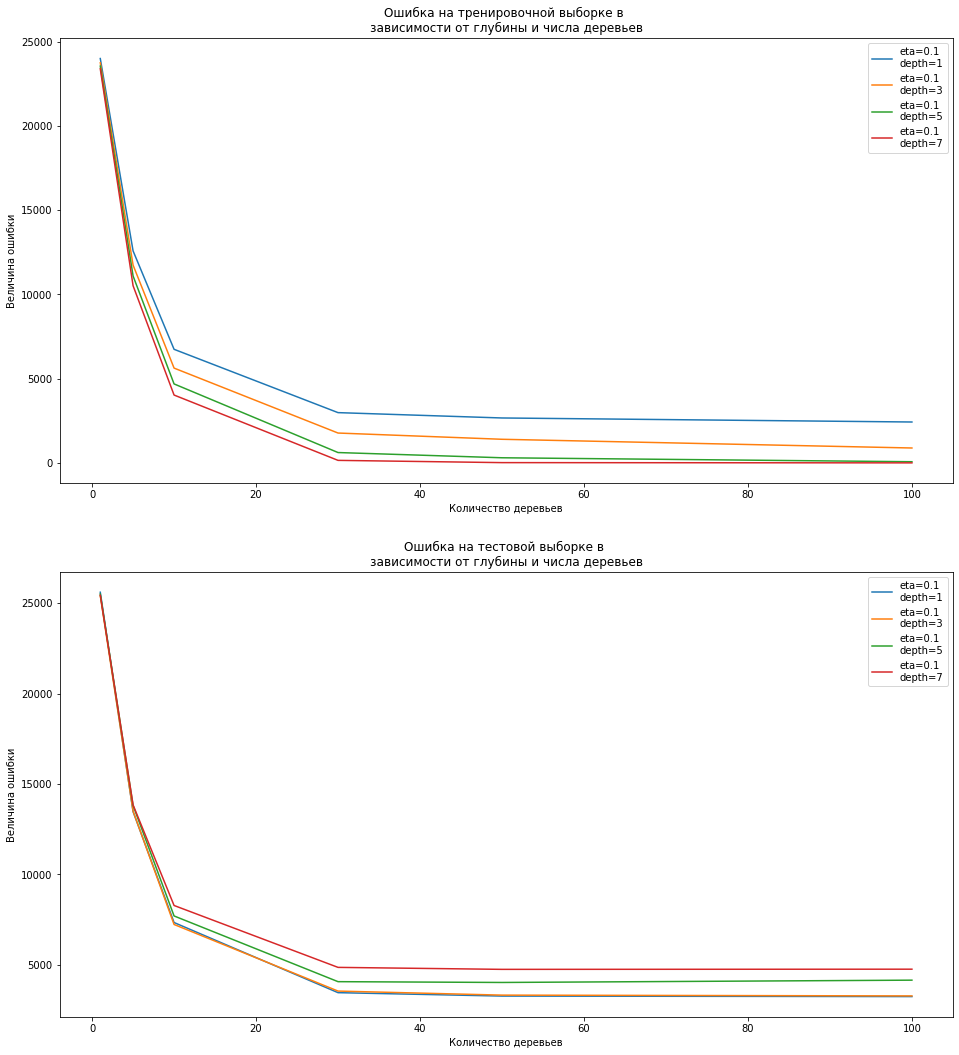

In [173]:
get_plot(tr_err, tst_err, eta, n_trees)

Из графиков видно, что при равных значениях шага обучения увеличение глубины деревьев ведет к снижению ошибки на трейне, но при этом ошибка на тесте растет, относительно менее глубоких деревьев. При этом, с увеличением числа деревьев с низкой глубиной ошибка на тесте уменьшается, в данном случае целесообразнее использовать лес из 100 пеньков.

Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [174]:
def gb_sgd_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        # Определяем случайные индексы
        random_idx = set()
        
        while len(random_idx) < X_train.shape[0]//2:
            random_idx.add(np.random.randint(0, X_train.shape[0]))
        random_idx=list(random_idx)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train[random_idx], y_train[random_idx])
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train[random_idx], bias(y_train[random_idx], target[random_idx]))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [175]:
n_trees=100
max_depth=4
eta=0.1
coefs=[1]*n_trees
trees, tr_err, tst_err=gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
sgd_trees, sgd_tr_err, sgd_tst_err=gb_sgd_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [176]:
def get_error_plot(n_trees, train_err, test_err):
    plt.figure(figsize=(16,10))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='sgd_train error')
    plt.legend(loc='upper right')
    plt.show()

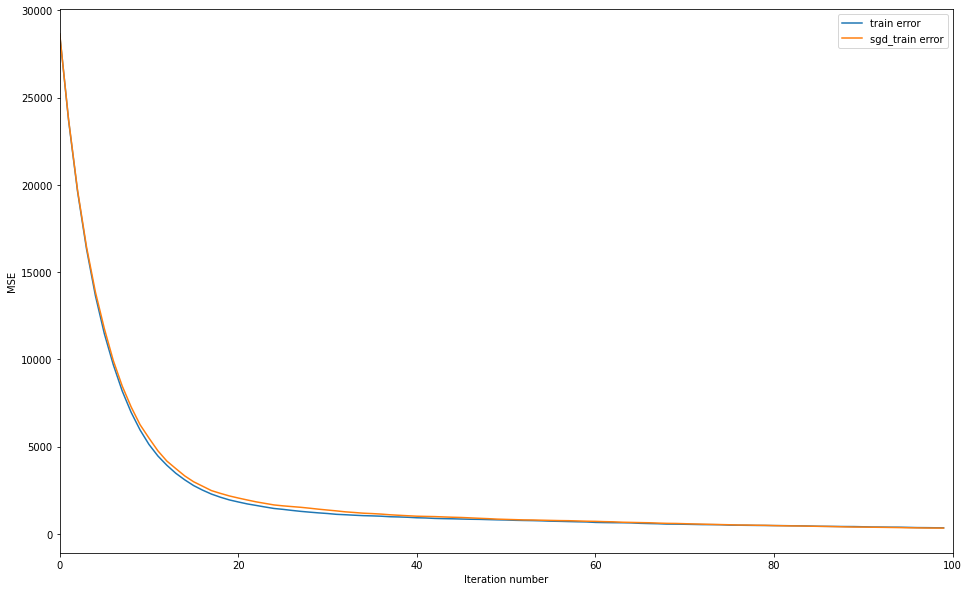

In [177]:
get_error_plot(n_trees, tr_err, sgd_tr_err)

Из графиков видно, что отличия практически нет

# Урок 7

## Задание 1

К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [179]:
from sklearn.base import TransformerMixin, BaseEstimator

class KNNClassifier(BaseEstimator, TransformerMixin):

    def __init__(self, k: int = 3, weights: str='uniform'):
        
        
        self.weights=weights
            
        self.k = k
        if weights not in ['uniform','distance','number']:
            raise ValueError(
                'значения параметра weights могут быть "uniform", "distance" или "number"'
            )


    def fit(self, X, y):
        self.X = X
        self.y = y

        return self

    def predict(self, X):
        answers = []
        for x in X:
            test_distances = []                
            for i in range(len(self.X)):                
                # расчет расстояния от классифицируемого объекта до
                # объекта обучающей выборки
                distance = self.e_metrics(x,self.X[i])                
                # Записываем в список значение расстояния и ответа на объекте обучающей выборки
                test_distances.append((distance, self.y[i]))
                if self.weights=='uniform':
                    classes = self.without_weigth(test_distances)
                elif  self.weights=='distance':
                    classes=self.dist_weights(test_distances) 
                else: 
                    classes=self.num_weights(test_distances)      
                
            # Записываем в список ответов наиболее часто встречающийся класс
            answers.append(sorted(classes, key=classes.get)[-1])
        return answers
    
    
    def e_metrics(self,x1, x2):    
        distance = 0
        for i in range(len(x1)):
            distance += np.square(x1[i] - x2[i])      
        return np.sqrt(distance)
    
    
    def without_weigth(self, test_distances):
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(self.y)}
         # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        #print(sorted(test_distances)[0:self.k])
        for d in sorted(test_distances)[0:self.k]:
            classes[d[1]] += 1
        return classes
    
    # реализуем добавление весов в зависимости от растояния до соседа
    def dist_weights(self, test_distances):
        classes = {class_item: 0 for class_item in set(self.y)}
         # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:self.k]:
            classes[d[1]] += 0.9**d[0]
        return classes
    
    # реализуем добавление весов в зависимости от номера соседа    
    def num_weights(self, test_distances):
        classes = {class_item: 0 for class_item in set(self.y)}
         # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for idx, d in enumerate(sorted(test_distances)[0:self.k]):
            classes[d[1]] += (self.k+1-(idx+1))/self.k 
        return classes
        
    
    @staticmethod
    def accuracy(pred, y):
        return (sum(pred == y) / len(y))

Создадим Датасет

In [182]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [183]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

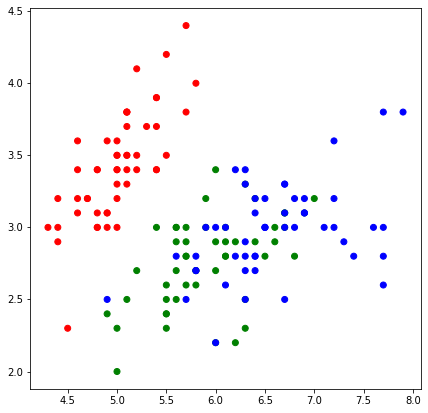

In [184]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)


Сравним точность алгоритмов

In [185]:
mod=KNNClassifier(k=10)
mod.fit(X_train, y_train)
y_pred=mod.predict(X_test)
print(f'Точность алгоритма при k = {mod.k}, и методе присвоения весов = {mod.weights}: {mod.accuracy(y_pred, y_test): .3f}')

Точность алгоритма при k = 10, и методе присвоения весов = uniform:  0.833


Точность алгоритма при k = 10, и методе присвоения весов = uniform:  0.833

In [186]:
mod=KNNClassifier(k=10, weights='distance')
mod.fit(X_train, y_train)
y_pred=mod.predict(X_test)
print(f'Точность алгоритма при k = {mod.k}, и методе присвоения весов = {mod.weights}: {mod.accuracy(y_pred, y_test): .3f}')

Точность алгоритма при k = 10, и методе присвоения весов = distance:  0.867


Точность алгоритма при k = 10, и методе присвоения весов = distance:  0.867

In [187]:
mod=KNNClassifier(k=10, weights='number')
mod.fit(X_train, y_train)
y_pred=mod.predict(X_test)
print(f'Точность алгоритма при k = {mod.k}, и методе присвоения весов = {mod.weights}: {mod.accuracy(y_pred, y_test): .3f}')

Точность алгоритма при k = 10, и методе присвоения весов = number:  0.867


Точность алгоритма при k = 10, и методе присвоения весов = number:  0.867

In [188]:
def get_graph(X_train, y_train, k, weights: str):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    mod=KNNClassifier(k=k, weights=weights)
    mod.fit(X_train,y_train)
    # Получим предсказания для всех точек
    Z = mod.predict(np.c_[xx.ravel(), yy.ravel()])

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}\n метод присвоения веса = {weights}")
    plt.show()

Сравним классификацию при разном определении весов соседей

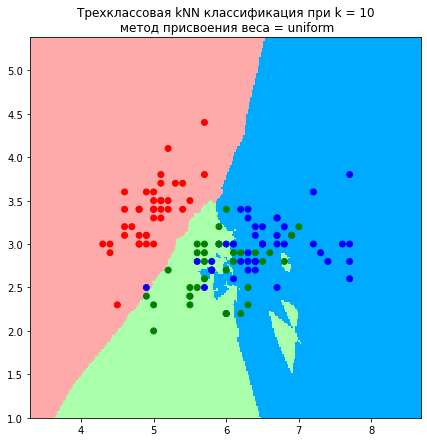

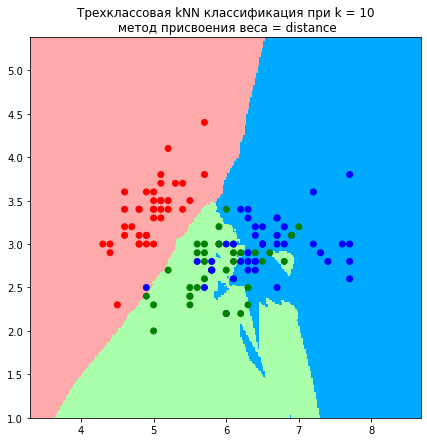

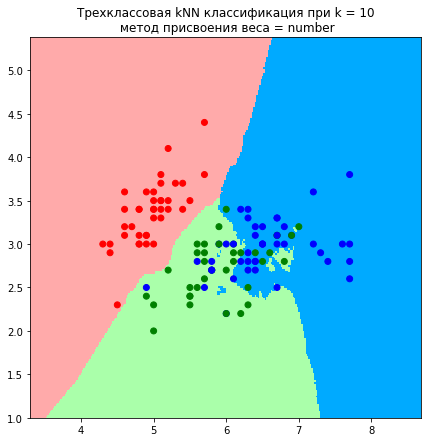

In [189]:
for weights in ['uniform','distance','number']:
    get_graph(X_train, y_train, 10, weights)

Подберем оптимальное количество соседей для каждого метода:

In [190]:
meth_list=['uniform','distance','number']
acc_dict={meth:[] for meth in meth_list}
n_neighbors=list(range(1,21))
for meth in meth_list:
    for neighbor in n_neighbors:
        mod=KNNClassifier(k=neighbor, weights=meth)
        y_pred=mod.fit(X_train,y_train).predict(X_test)
        acc_dict[meth].append(mod.accuracy(y_pred, y_test))

In [191]:
acc_dict

{'uniform': [0.6666666666666666,
  0.6666666666666666,
  0.7333333333333333,
  0.8333333333333334,
  0.8666666666666667,
  0.8333333333333334,
  0.8,
  0.8,
  0.8666666666666667,
  0.8333333333333334,
  0.8333333333333334,
  0.8,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8,
  0.8333333333333334,
  0.8333333333333334],
 'distance': [0.6666666666666666,
  0.7333333333333333,
  0.7333333333333333,
  0.8,
  0.8666666666666667,
  0.8666666666666667,
  0.8,
  0.8666666666666667,
  0.8666666666666667,
  0.8666666666666667,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334,
  0.8333333333333334],
 'number': [0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.7333333333333333,
  0.7333333333333333,
  0.7666666666666667,
  0.8333333333333334,
  0.8333333333333334,

<function matplotlib.pyplot.show(*args, **kw)>

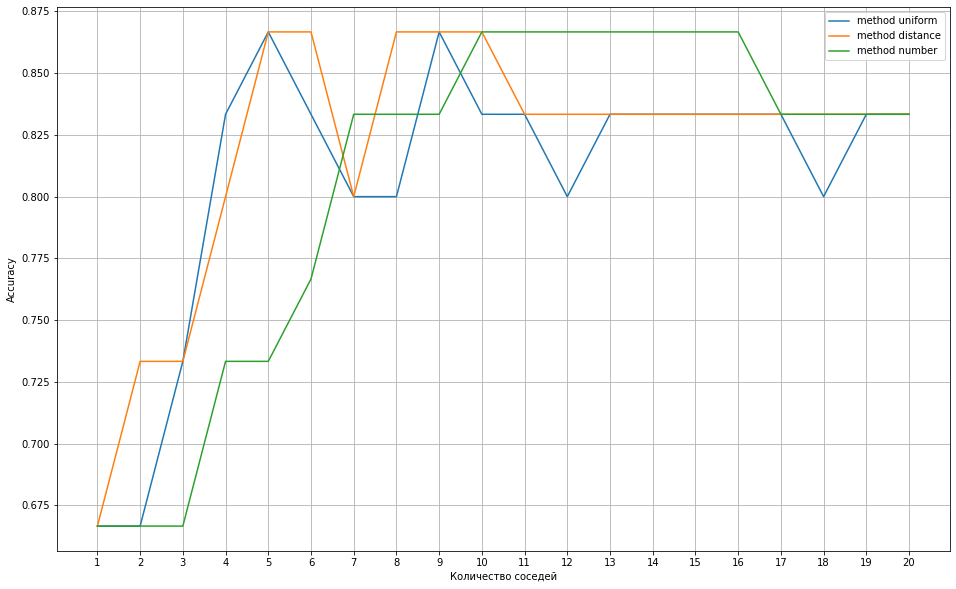

In [192]:
plt.figure(figsize=(16,10))
for key,val in acc_dict.items():
    plt.plot(n_neighbors, acc_dict[key],  label=f'method {key}')
plt.grid()
plt.xticks(n_neighbors)
plt.xlabel('Количество соседей')
plt.ylabel('Accuracy')
plt.legend()
plt.show

Из представленных графиков видно, что использование метода весов в зависимости от дистанции до ближайших к-соседей либо от номера блихайшего соседа, делает разделяющую гиперплоскость менее сложной, при этом точность этих моделей сопоставима.

Оптимальное количество соседей для модели без учёта весов, и модели с учётом весов в зависимости от расстояния - 5, а для модели с учетом весов в зависимости от номера - 10.

## Задание 2

Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

# Урок 8

## Задание

* Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd()
* Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.
* Принять участие в одном или двух соревнованиях и прислать свой псевдоним на Kaggle и ссылку на github с решением задачи.

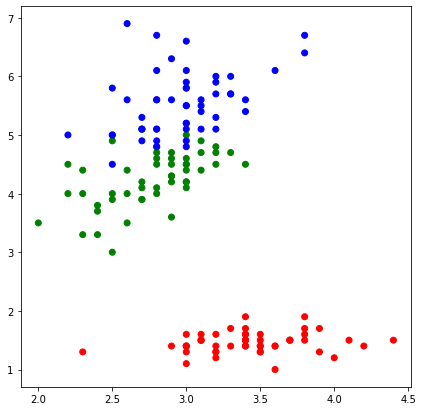

In [193]:
X, y = load_iris(return_X_y=True)
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cmap)

Напишем разложение на главные компоненты с помощью сингулярного разложения.

In [194]:
class MySVD:
    
    #инициируем метод с указанием количества компонент, которые будут использованы в итоговом датасете(n_comp, по умолчанию-все)
    #и указанием необходимости центрирования данных(по умолчанию - центрируем)
    def __init__(self,n_comp: int=None, centr: bool=True):    
        self.n_comp=n_comp
        self.centr=centr
    
    #обучение
    def fit(self, X):
        if not self.n_comp:
            self.n_comp=X.shape[1]
        self.X_centr=(X-np.mean(X, axis=0))/np.std(X, axis=0) if self.centr else X.copy()
        self.u,self.s,self.vh=np.linalg.svd(self.X_centr, full_matrices=False) #сингулярное разложение матрицы признаков
        self.W=self.vh.T[:,:self.n_comp]  #нахождение матрицы весов        
    
    def transform(self):
        x_trans=self.X_centr@self.W
        return x_trans
    
    # доля объясненной дисперсии
    def var_exp(self):
        eig_sum = sum(self.s)
        var_exp = [(i / eig_sum) * 100 for i in self.s]
        return var_exp
    
    # накопленная объясненная дисперсия
    def cum_var_exp(self):        
        eig_sum = sum(self.s)
        var_exp = [(i / eig_sum) * 100 for i in self.s]
        return np.cumsum(var_exp)
    
    # сингулярные числа
    def sing_nums(self):
        return self.s
        

В качестве модели классификации используем наш случайный лес из прошлых лекций.

In [195]:
# Генерация N-бутстрап выборок


def get_bootstrap(data, labels, N):
    random.seed(42)
    n_samples = data.shape[0]
    bootstrap = []
    
    for i in range(N):
        b_data = np.zeros(data.shape)
        b_labels = np.zeros(labels.shape)
        for j in range(n_samples):
            sample_index = random.randint(0, n_samples-1)
            b_data[j] = data[sample_index]
            b_labels[j] = labels[sample_index]            
        bootstrap.append((b_data, b_labels))
        
    return bootstrap

In [196]:
def get_subsample(len_sample):
    # будем сохранять не сами признаки, а их индексы
    sample_indexes = [i for i in range(len_sample)]
    
    len_subsample = int(np.sqrt(len_sample))
    subsample = []
    
    random.shuffle(sample_indexes)
    for _ in range(len_subsample):
        subsample.append(sample_indexes.pop())
        
    return subsample

In [197]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [198]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        # подсчет количества объектов разных классов
        classes = {}  # сформируем словарь "класс: количество объектов"
        for label in self.labels:
            if label not in classes:
                classes[label] = 0
            classes[label] += 1
        #  найдем класс, количество объектов которого будет максимальным в этом листе и вернем его    
        prediction = max(classes, key=classes.get)
        return prediction     

In [199]:
# Расчет критерия Джини

def gini(labels):
    #  подсчет количества объектов разных классов
    classes = {}
    for label in labels:
        if label not in classes:
            classes[label] = 0
        classes[label] += 1
    
    #  расчет критерия
    impurity = 1
    for label in classes:
        p = classes[label] / len(labels)
        impurity -= p ** 2
        
    return impurity

In [200]:
# Расчет качества

def quality(left_labels, right_labels, current_gini):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_gini - p * gini(left_labels) - (1 - p) * gini(right_labels)

In [201]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [202]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_gini = gini(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    # выбор индекса из подвыборки длиной sqrt(n_features)
    subsample = get_subsample(n_features)
    
    for index in subsample:
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_gini)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [203]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels):

    quality, t, index = find_best_split(data, labels)

    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
    if quality == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)

    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels)
    false_branch = build_tree(false_data, false_labels)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [204]:
def random_forest(data, labels, n_trees):
    forest = [] # список деревьев
    bootstrap = get_bootstrap(data, labels, n_trees) # создаем n_trees бутстреп выборок
    
    for b_data, b_labels in bootstrap:
        forest.append(build_tree(b_data, b_labels)) # добавляем по дереву в ансамбль
    return forest

In [205]:
# Функция классификации отдельного объекта

def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [206]:
# функция формирования предсказания по выборке на одном дереве

def predict(data, tree):
    
    classes = []
    for obj in data:
        prediction = classify_object(obj, tree)
        classes.append(prediction)
    return classes

In [207]:
# предсказание голосованием деревьев

def tree_vote(forest, data):

    # добавим предсказания всех деревьев в список
    predictions = []
    for tree in forest:
        predictions.append(predict(data, tree))
    
    # сформируем список с предсказаниями для каждого объекта
    predictions_per_object = list(zip(*predictions))
    
    # выберем в качестве итогового предсказания для каждого объекта то,
    # за которое проголосовало большинство деревьев
    voted_predictions = []
    for obj in predictions_per_object:
        voted_predictions.append(max(set(obj), key=obj.count))
        
    return voted_predictions

In [208]:
# Введем функцию подсчета точности как доли правильных ответов

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

Разобьём нашу выборку на трейн и тест, и получим точность модели на исходных данных:

In [209]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [210]:
my_forest=random_forest(X_train, y_train, 15)
y_pred = tree_vote(my_forest, X_test)
accuracy_metric(y_test, y_pred)

95.55555555555556

Преобразуем наши исходные данные выделив 3 главные компоненты из 4 признаков.

In [211]:
my_svd=MySVD(n_comp=3)
my_svd.fit(X)
X_trans=my_svd.transform()

In [212]:
X_train_trans, X_test_trans, y_train_trans, y_test_trans = model_selection.train_test_split(X_trans, y, test_size=0.3, random_state=1)

In [213]:
my_forest_trans=random_forest(X_train_trans, y_train_trans, 20)
y_pred_trans = tree_vote(my_forest_trans, X_test_trans)
accuracy_metric(y_test_trans, y_pred_trans)

91.11111111111111

Как видим есть снижение точности при использовании 3 компонент, которое связано с тем, что первые три компоненты объясняют 95,5% дисперсии данных.

In [214]:
my_svd.cum_var_exp()

array([ 53.52971788,  83.48653067,  95.49021308, 100.        ])

In [215]:
my_svd.sing_nums()

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [216]:
my_svd.var_exp()

[53.52971788236241, 29.95681278402008, 12.003682417209488, 4.509786916408035]